In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [2]:
#Parameters
F = 1/20

alphaP = 1
betaP  = 0
gammaP = 0
alphaQ = 1
betaQ  = 0
gammaQ = 0
eps    = .003
V      = .004
F      = .3
lam    = 18 #in keV
a      = .16
b      = .18



In [10]:
#Pseudo-Analytic Solution #1    
def fv(p0, q0, x0):
    stdP = np.sqrt(alphaP+betaP*x0+gammaP*(x0**2))
    stdQ = np.sqrt(alphaQ+betaQ*x0+gammaQ*(x0**2))
    stdN = np.sqrt(F*x0/eps)
    meanN = x0/eps
    #print(meanN,stdP,stdQ,stdN)
    av = (((V/stdP)**2)+((eps/stdQ)**2)+((1/stdN)**2))/2
    bv = (V*(x0-p0)/(stdP**2)-eps*q0/(stdQ**2)-meanN/(stdN**2))
    cv = ((((x0-p0)/stdP)**2)+((q0/stdQ)**2)+((meanN/stdN)**2))/2
    f_pq_r = np.exp(((bv**2)/(4*av)-cv))/(2*math.pi*stdQ*stdP*stdN*math.sqrt(2*av))
    f_r = np.exp(-x0/lam)/lam
    ans = f_pq_r*f_r
    #ans = ((bv**2)/(4*av)-cv)
    #print(((bv**2)/(4*av)-cv))
    #print(av,bv,cv)
    #print(stdP,stdQ,stdN,av,bv,cv,(bv**2)/(4*av)-cv,ans)
    return ans

def fv_exp(p0, q0, x0):
    stdP = np.sqrt(alphaP+betaP*x0+gammaP*(x0**2))
    stdQ = np.sqrt(alphaQ+betaQ*x0+gammaQ*(x0**2))
    stdN = np.sqrt(F*x0/eps)
    meanN = x0/eps
    #print(meanN,stdP,stdQ,stdN)
    av = (((V/stdP)**2)+((eps/stdQ)**2)+((1/stdN)**2))/2
    bv = (V*(x0-p0)/(stdP**2)-eps*q0/(stdQ**2)-meanN/(stdN**2))
    cv = ((((x0-p0)/stdP)**2)+((q0/stdQ)**2)+((meanN/stdN)**2))/2
    f_pq_r = np.exp(((bv**2)/(4*av)-cv))/(2*math.pi*stdQ*stdP*stdN*math.sqrt(2*av))
    f_r = np.exp(-x0/lam)/lam
    #ans = f_pq_r*f_r
    ans = ((bv**2)/(4*av)-cv)
    #print(((bv**2)/(4*av)-cv))
    #print(av,bv,cv)
    #print(stdP,stdQ,stdN,av,bv,cv,(bv**2)/(4*av)-cv,ans)
    return ans

f = lambda x0, p0, q0: fv(p0,q0,x0)
f_vec = np.vectorize(f)


f_exp = lambda x0, p0, q0: fv_exp(p0,q0,x0)
f_vec_exp = np.vectorize(f_exp)


def Fv0(p0,q0):
    ans = integrate.quad(f, 0, np.inf, args = (p0,q0,))[0]
    return ans

def Fv(p0,q0):
    sigP = math.sqrt(alphaP+betaP*(p0-(V*q0/eps))+gammaP*((p0-(V*q0/eps))**2))
    sigQ = math.sqrt(alphaQ+betaQ*(p0-(V*q0/eps))+gammaQ*((p0-(V*q0/eps))**2))
    L = ((V/(sigP**2))**2)/(2*(((V/sigP)**2)+((eps/sigQ)**2)))
    delt = ((sigP**2)/V)*((eps*q0)/(sigQ**2)+(1/F)-(V*p0)/(sigP**2))
    H = eps/(F*(((V/sigP)**2)+((eps/sigQ)**2)))
    a0 = -1/(2*sigP)+L
    b0 = p0/(sigP**2)-1/(2*F*eps)-1/lam+L*(2*delt-H)
    sca = -1/(2*a0)
    loc = b0/(2*a0)
    minx = np.max((loc-3*sca),0)
    maxx = (loc+3*sca)
    ans = integrate.quad(f, minx, maxx, args = (p0,q0,))[0]
    #print(minx,maxx,ans)
    #plt.plot(np.arange(minx,maxx,20),fv(p0,q0,np.arange(minx,maxx,20)))
    #plt.show()
    return ans

In [4]:
ErTest = 20
EpTest = ErTest*(1 + (V/eps))
EqTest = ErTest

print(EpTest,EqTest,ErTest)

print(fv(EpTest,EqTest,ErTest))

46.66666666666666 20 20
0.0028405572891046925


-0.18 -122.15777777777771


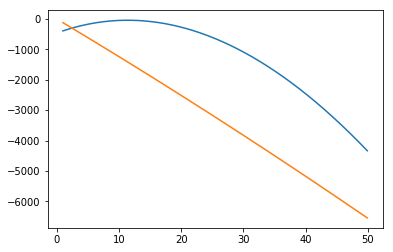

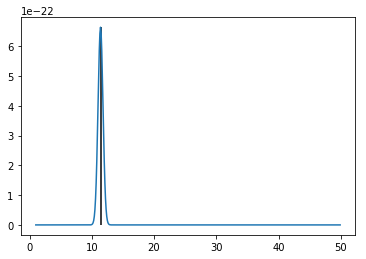

11.40000000000001


In [30]:
ran = np.arange(1,50,.1)

#EpTestVals = np.arange
EqTest = 20
EpTest = 23

p0=EpTest
q0=EqTest

sigP = math.sqrt(alphaP+betaP*(p0-(V*q0/eps))+gammaP*((p0-(V*q0/eps))**2))
sigQ = math.sqrt(alphaQ+betaQ*(p0-(V*q0/eps))+gammaQ*((p0-(V*q0/eps))**2))
L = ((V/(sigP**2))**2)/(2*(((V/sigP)**2)+((eps/sigQ)**2)))
delt = -((sigP**2)/V)*((eps*q0)/(sigQ**2)-(1/F)-(V*p0)/(sigP**2))
H = eps/(F*(((V/sigP)**2)+((eps/sigQ)**2)))
a0 = -1/(2*sigP**2)+L
b0 = p0/(sigP**2)-1/(2*F*eps)-1/lam+L*(2*delt-H)
sca = -1/(2*a0)
loc = b0/(2*a0)

print(a0,b0)


y_vec = (f_vec_exp(ran,EpTest,EqTest))
#print(np.nanargmax(y_vec))
maxval = (ran[np.nanargmax(y_vec)])

plt.plot(ran,f_vec_exp(ran,EpTest,EqTest))
plt.plot(ran,a0*(ran**2)+b0*ran)
plt.show()
plt.plot(ran,f_vec(ran,EpTest,EqTest))
plt.vlines(maxval,0,f(maxval,EpTest,EqTest))
plt.show()
print(maxval)